<a href="https://colab.research.google.com/github/ZoubirCHATTI/03_Fourier_analysis/blob/main/02_Audio_Hum_Removal/notebooks/01_Audio_synthetic_hum__construction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generation of a synthetic audio signal with Hum effect**

In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import requests
from IPython.display import Audio

In [2]:
#Uploading the file from Github
url = "https://raw.githubusercontent.com/ZoubirCHATTI/03_Fourier_analysis/main/02_Audio_Hum_Removal/data/01.wav"
filename = "01.wav"
r = requests.get(url)
with open(filename, "wb") as f:
    f.write(r.content)

In [3]:
#Reading the audio file
fs, s=wavfile.read(filename)

#Definng the time axis
t=np.linspace(0, len(s)/fs, len(s))

#IF the signal is stereo, we keep only the first component
if s.ndim > 1:
  s=s[: , 0]

#Normalizing the signal
s_normalized=s/np.max(s)

/tmp/ipython-input-333484594.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, s=wavfile.read(filename)


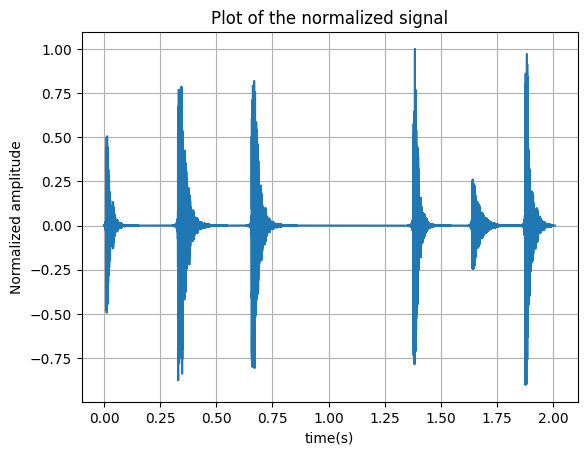

In [4]:
#Plotting of the normalized audio signal
plt.figure()
plt.plot(t ,  s_normalized)
plt.xlabel('time(s)')
plt.ylabel('Normalized amplitude')
plt.title('Plot of the normalized signal')
plt.grid(True)

In [5]:
#To play the signal
Audio(s, rate=fs/2)

In [6]:
#Génaration of a synthetic Hum sound and its harmonics
f0, f1, f2 , f3=50, 100 , 150 , 200
hum=np.sin(2*np.pi*f0*t)+0.3*np.sin(2*np.pi*f1*t)+0.1*np.sin(2*np.pi*f2*t)+0.2*np.sin(2*np.pi*f3*t)

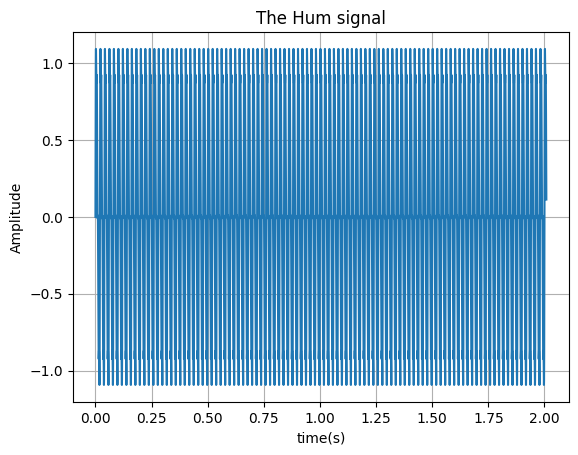

In [7]:
#Plot of thee Hum signal
plt.figure()
plt.plot(t, hum)
plt.xlabel('time(s)')
plt.ylabel('Amplitude')
plt.title('The Hum signal')
plt.grid(True)

In [8]:
#Adding hum signal to the original
hum_audio=s_normalized+0.05*hum

In [9]:
#Playing the audio with hum
Audio(hum_audio, rate=fs/2)

In [10]:
#Saviing the generetad signal
import soundfile as sf
from google.colab import files
sf.write('hum_audio.wav', hum_audio, fs)
#files.download('hum_audio.wav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>